# WISCS
> Words and images in shared conceptual space

## Imports
A specalized module, `wiscs`, has been written to generated data that aligns with the various hypothesis proposed in this study.

In [1]:
from wiscs.simulate import DataGenerator
from wiscs.utils import set_params

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Params

`wiscs` generates data based on a set of parameters specified by the user in the form of a python dictionary. A template can be accessed and modified by running the following cell.

In [2]:
# set experiment parameters
template = set_params(return_empty=True)
print()
template

Params must be a dictionary of dictionaries with the following keys:
 dict_keys(['word', 'image', 'n_participants', 'n_trials', 'variance'])


{'word': {'perceptual': None, 'conceptual': None, 'task': None},
 'image': {'perceptual': None, 'conceptual': None, 'task': None},
 'n_participants': None,
 'n_trials': None,
 'variance': None}

In [3]:
params = {
    "word": {
        "perceptual": 190, #ms to get from input -> perceptual processes
        "conceptual": 230, # ms to get from perceptual -> conceptual processes
        "task": 100 # ms to get from conceptual -> task processes
    }, 
    "image": {
        "perceptual": 215,
        "conceptual": 220, 
        "task": 130
    },
    "n_participants": 200,
    "n_trials": 30,
    "variance": 0.1
}

if set_params(params):
    print("Parameters set successfully")

Parameters set successfully


## Data generation
As seen in the [README.md](/README.md), we make certain hypotheses about the data. `DataGenerator` simulates data that aligns with our main and alternative hypotheses using the `generate()` method. 

In [4]:
DG = DataGenerator(params=params)

word, image, target = DG.generate(dist_type='same').data

You cam also turn this data into a Pandas dataframe in tidy format. This includes columns that model a single data point as a participant's reaction time to a single trial. 

In [6]:
df = DG.to_pandas()
df.to_csv("data/same.csv", index=False)
df.head()

,trial,type,RT,modality,participant
0,0,same,0.483388,word,0
1,0,same,0.554325,image,0
2,0,same,0.320260,word,1
3,0,same,0.538337,image,1
4,0,same,0.480596,word,2


`generate()` outputs three values: reaction times for trials of words and images and a parameter estimate or vector of deltas used to simulate trials or derived from trials, respictively. For example, we hypothesize that differences in reaction times across modalities will be constant across all types of semantic questions. We estimate a common distribution difference, called `target` based on `params`. Alternatively, when generating data from the alternative distribution, trial differences are random. These empirical differences are then returned (mainly for plotting purposes).

In [7]:
word1, image1, diff = DG.generate(dist_type='diff').data
DG.to_pandas().to_csv("data/diff.csv", index=False)

## Visualizing the data

### Main hypothesis

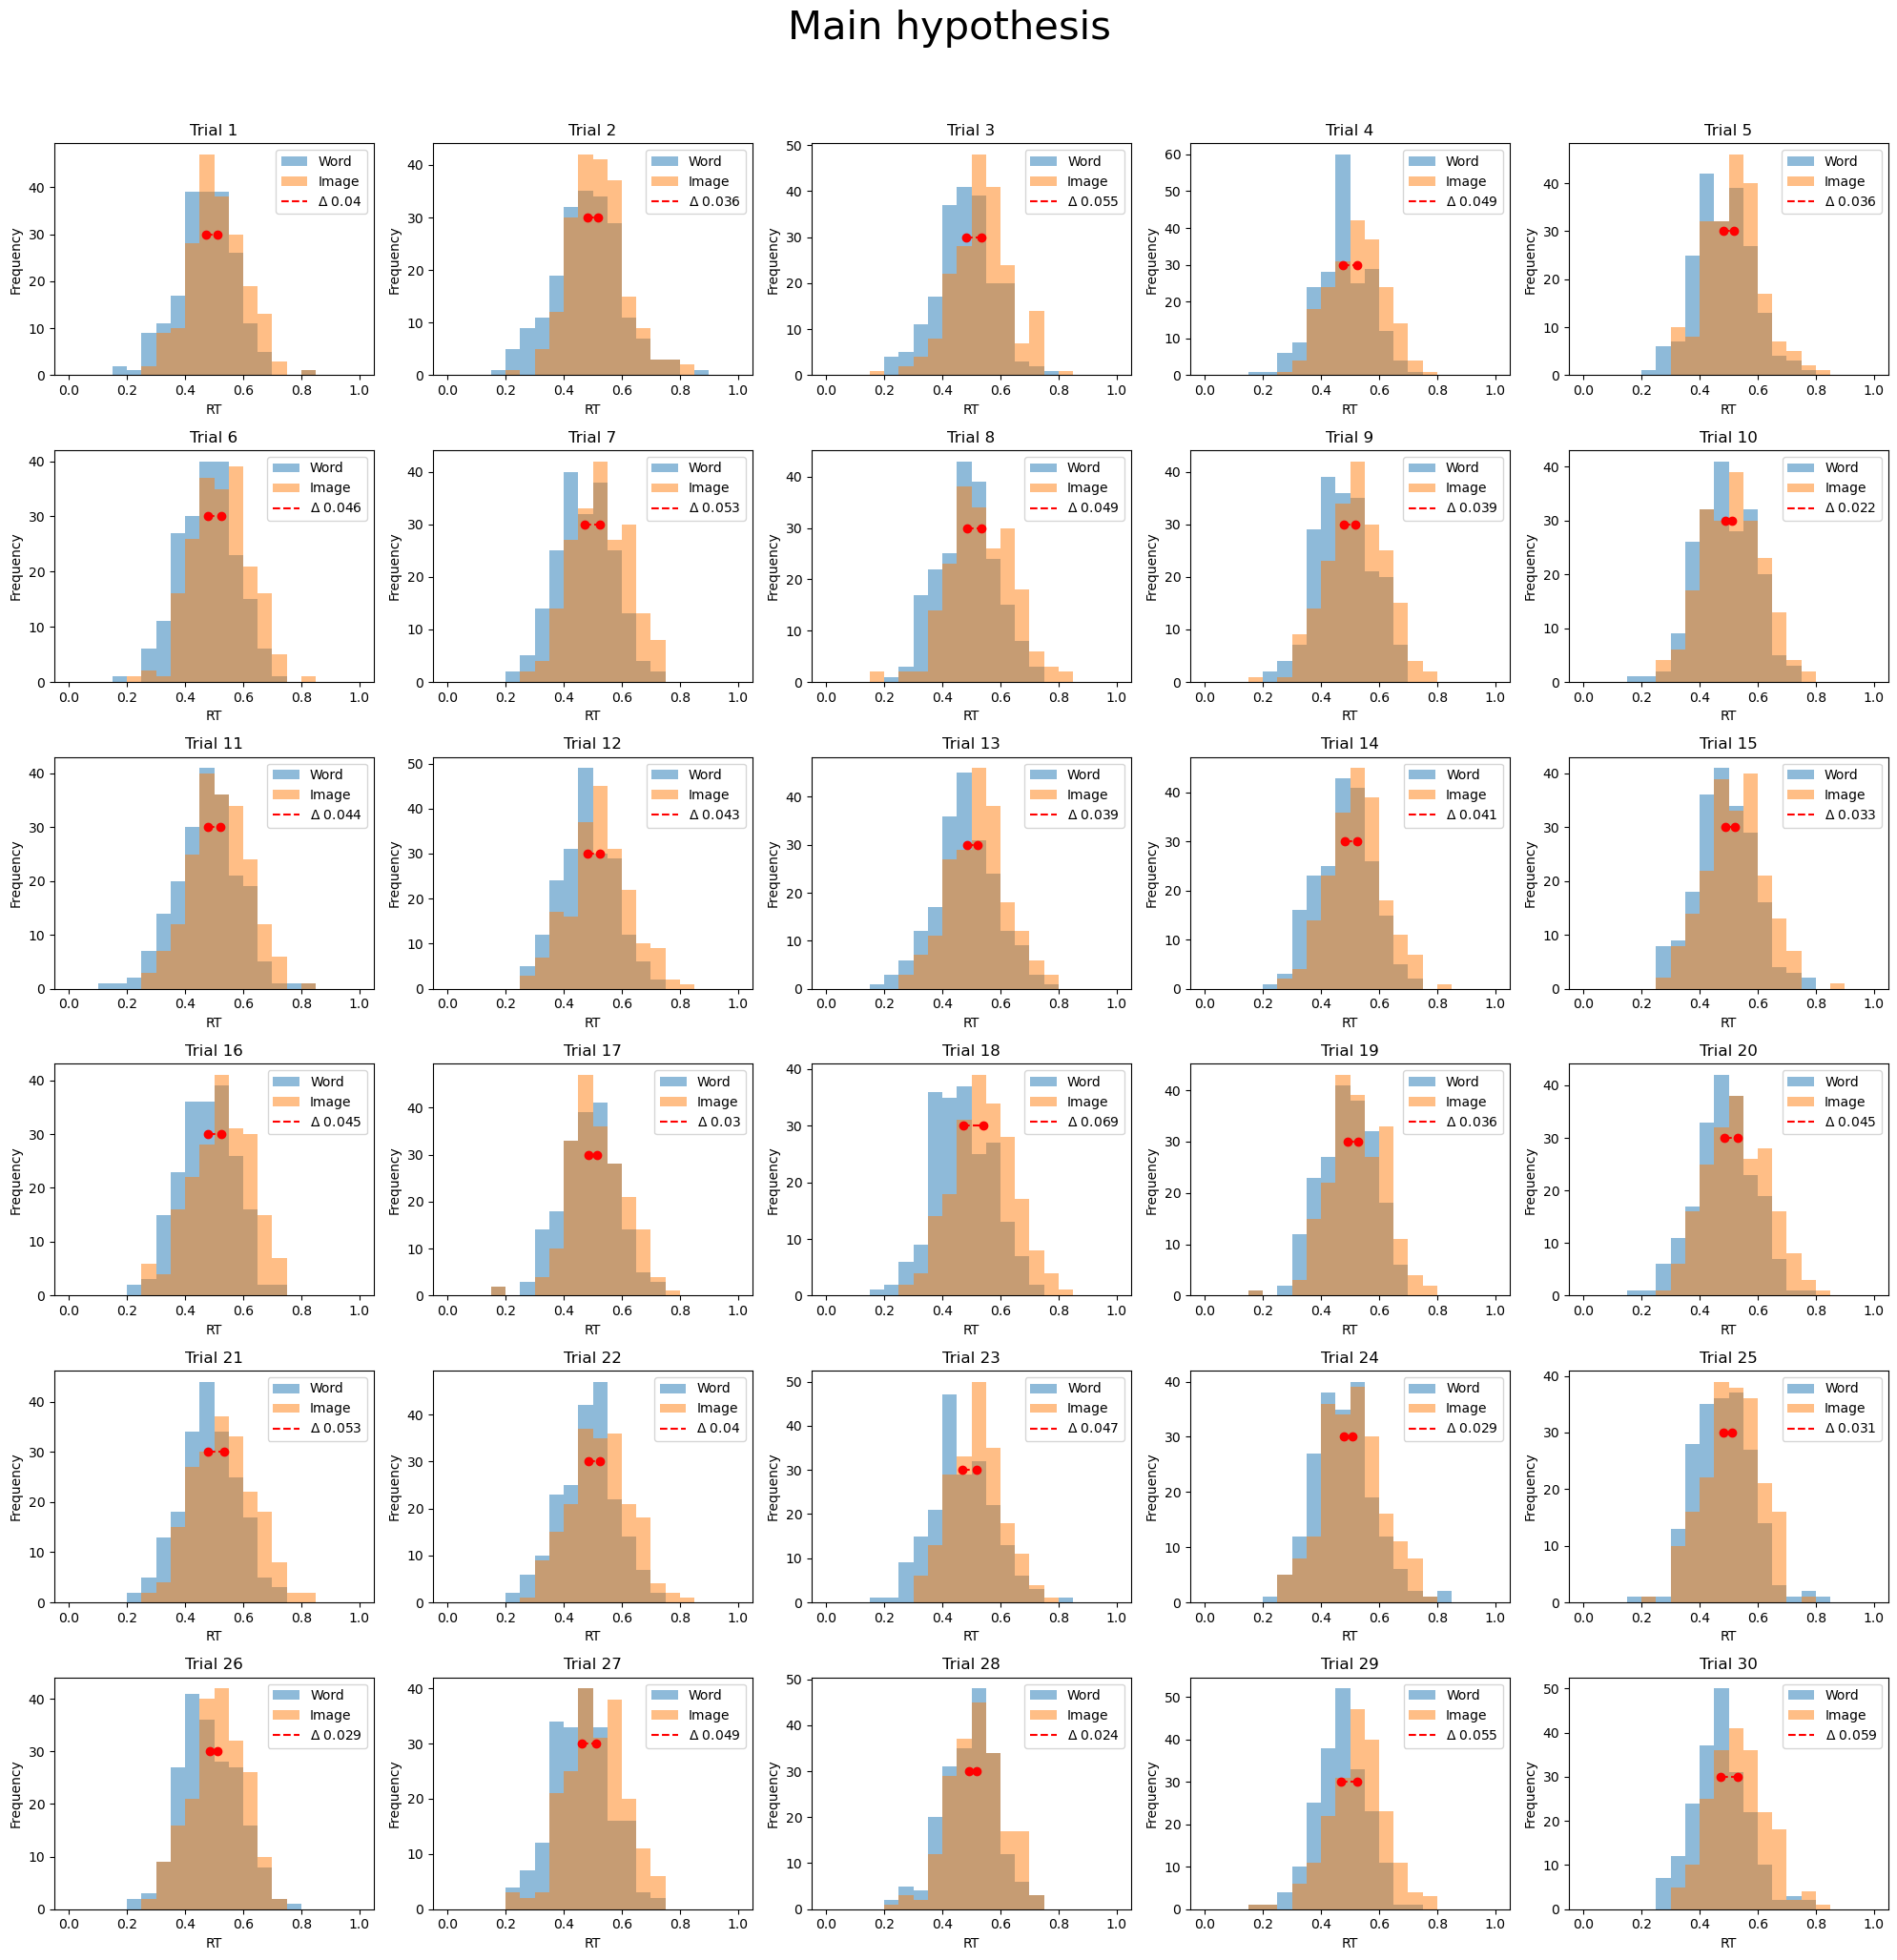

In [31]:
# Visualization
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for trial in range(params["n_trials"]):
    row = trial // 5
    col = trial % 5
    ax = axs[row, col]
    
    # Plot histograms
    ax.hist(word[trial], alpha=0.5, label="Word", bins=20, range=(0, 1))
    ax.hist(image[trial], alpha=0.5, label="Image", bins=20, range=(0, 1))

    w_mean = word[trial].mean()
    i_mean = image[trial].mean()
    
    # Calculate and display mean difference
    delta = np.abs(round(w_mean - i_mean, 3))
    
    # # Plot horizontal line at the y-value of the means
    ax.axhline(y=30, xmin=word[trial].mean(), xmax=image[trial].mean(), color="red", linestyle="--", label=r'$\Delta$ {}'.format(delta))
    
    # # Plot mean points
    ax.scatter([w_mean, i_mean], [30, 30], color="red", zorder=5)

    ax.set_title("Trial {}".format(trial + 1))
    ax.set_xlabel("RT")
    ax.set_ylabel("Frequency")
    
    ax.legend()

fig.suptitle("Main hypothesis", fontsize=30, y=1.025)

plt.tight_layout()

plt.savefig("figs/main_dist.png", dpi=500)

plt.show()

### Alternative hypothesis

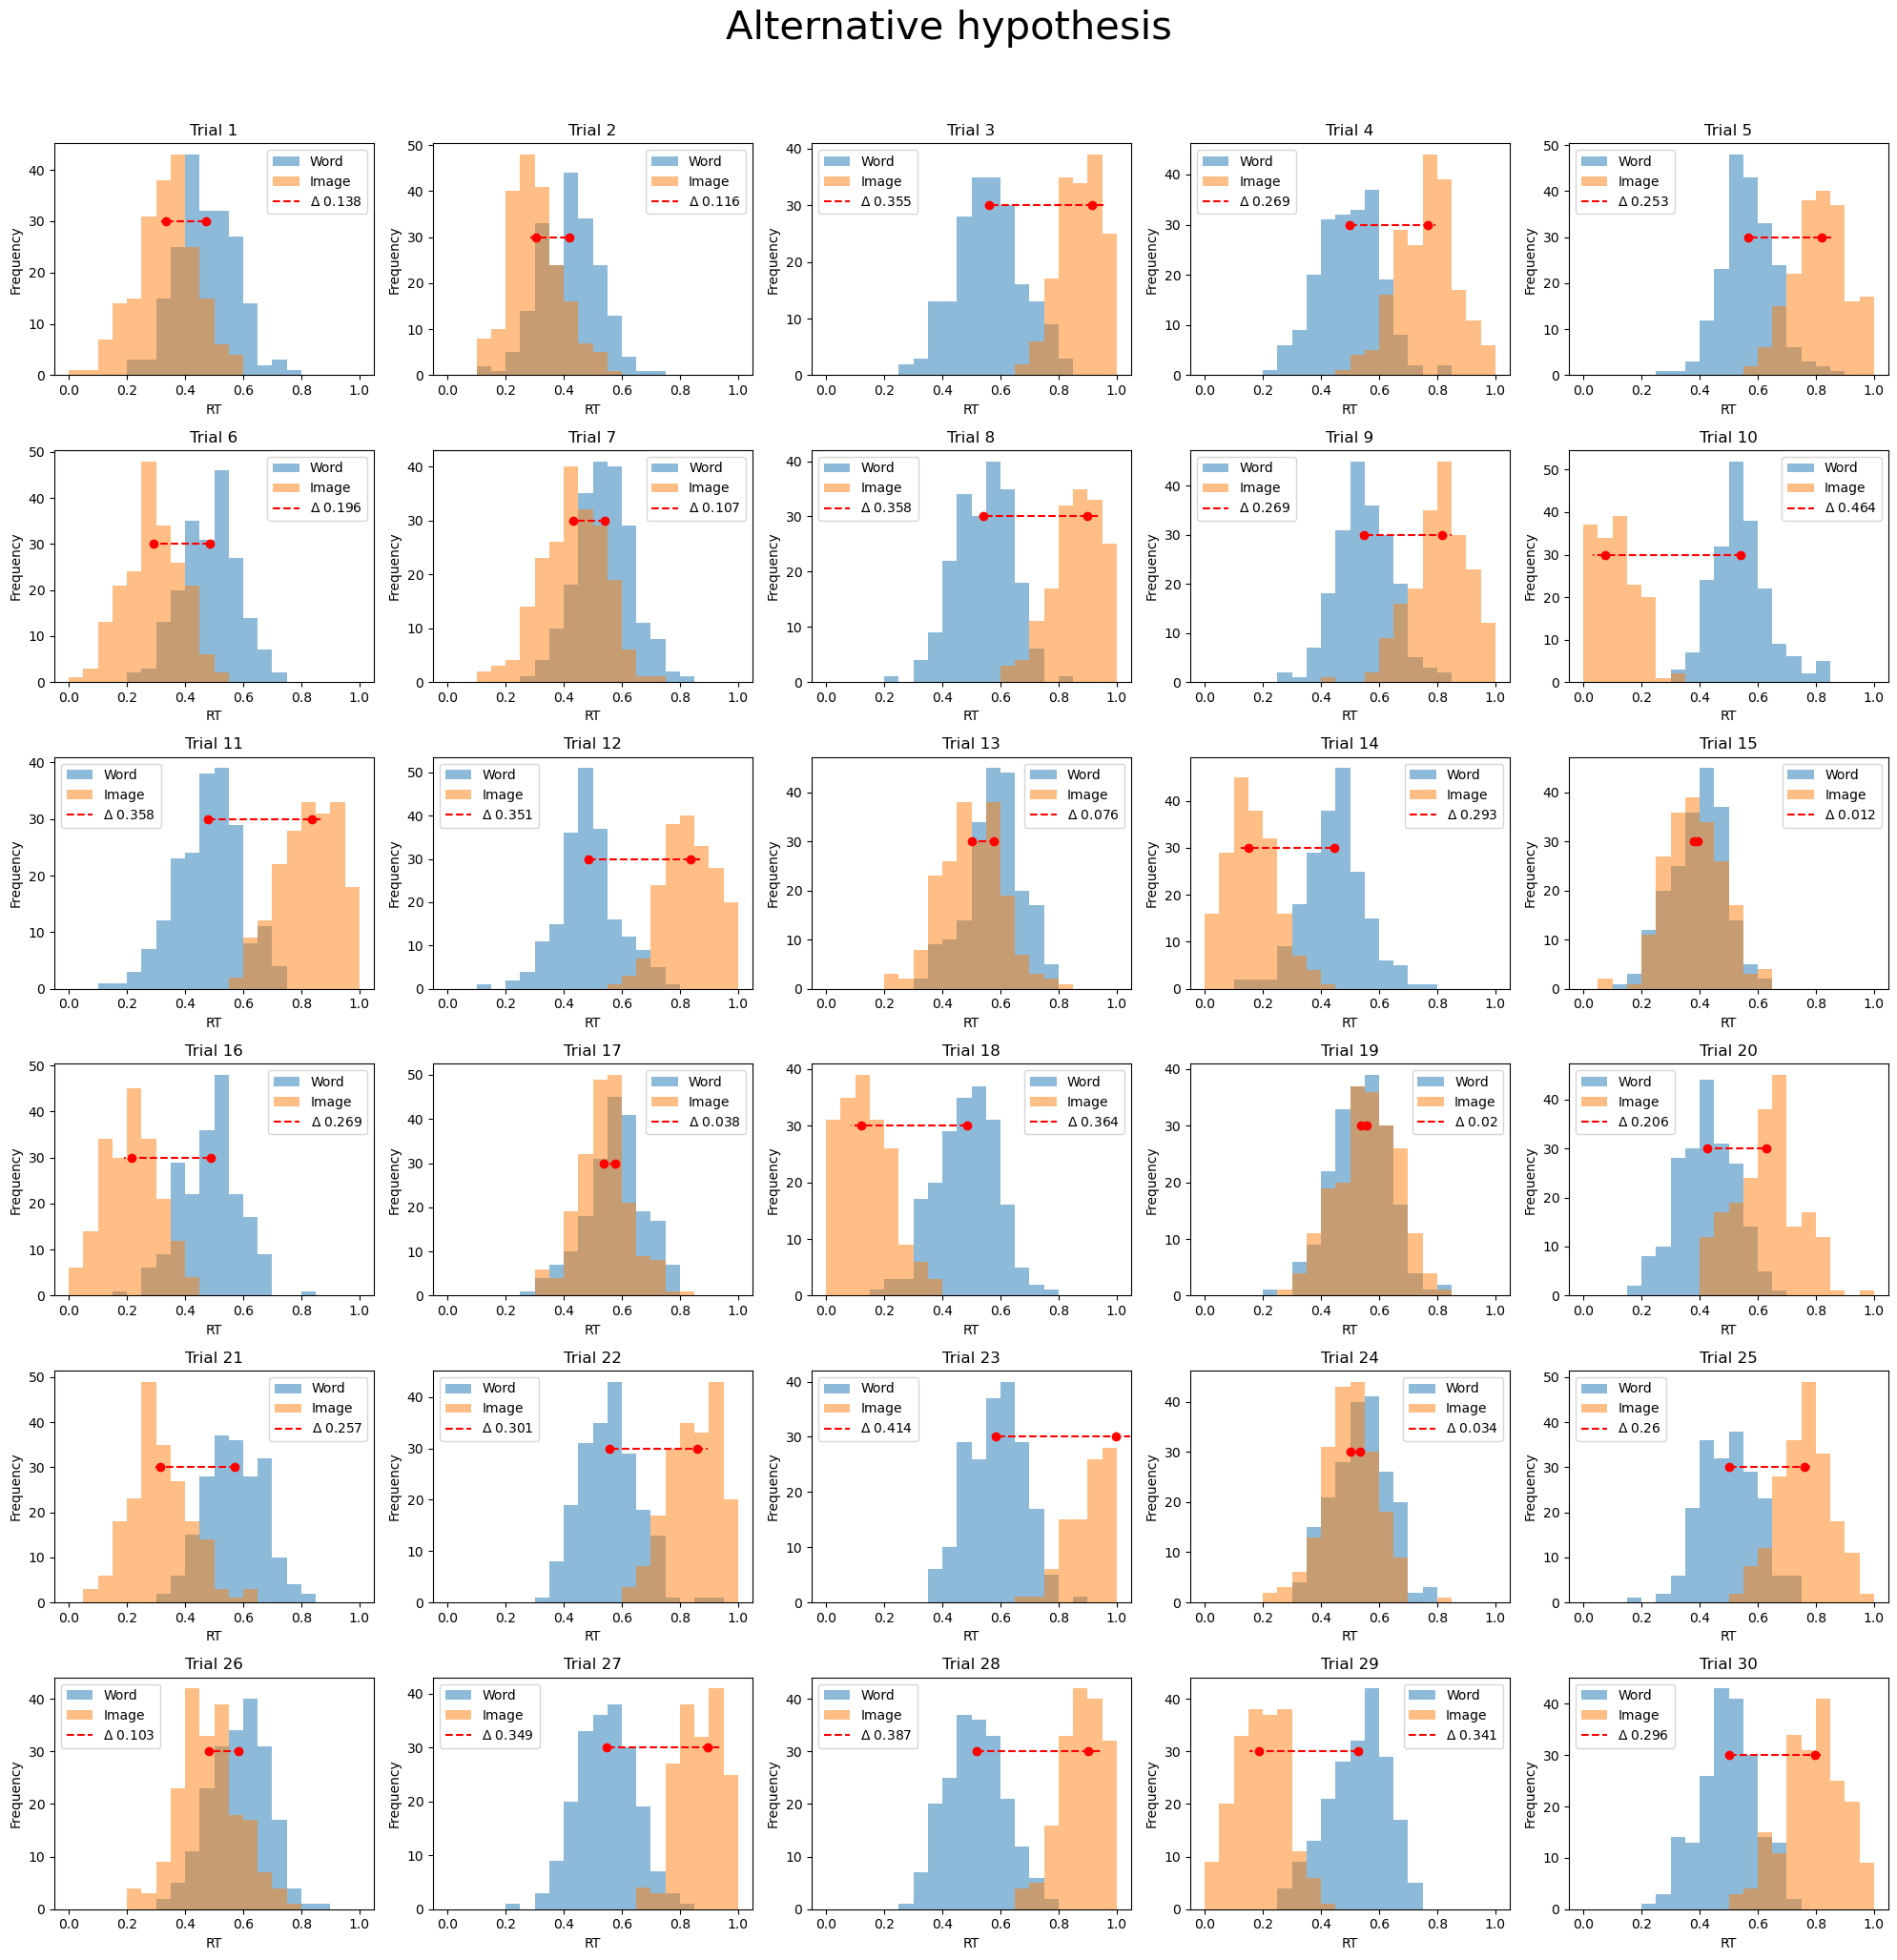

In [32]:
# Visualization with corrected horizontal line placement
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
for trial in range(params["n_trials"]):
    row = trial // 5
    col = trial % 5
    ax = axs[row, col]
    
    # Plot histograms
    ax.hist(word1[trial], alpha=0.5, label="Word", bins=20, range=(0, 1))
    ax.hist(image1[trial], alpha=0.5, label="Image", bins=20, range=(0, 1))
    
    # Calculate means
    w1_mean = word1[trial].mean()
    i1_mean = image1[trial].mean()
    
    # Calculate and display mean difference
    delta = np.abs(round(w1_mean - i1_mean, 3))
    
    # Plot horizontal line directly between the means
    ax.axhline(y=30, xmin=w1_mean, xmax=i1_mean, color="red", linestyle="--", label=r'$\Delta$ {}'.format(delta))
    
    # Plot markers at the means
    ax.scatter([w1_mean, i1_mean], [30, 30], color="red", zorder=5)

    ax.set_title("Trial {}".format(trial + 1))
    ax.set_xlabel("RT")
    ax.set_ylabel("Frequency")
    
    ax.legend()

fig.suptitle("Alternative hypothesis", fontsize=30, y=1.025)

plt.tight_layout()

plt.savefig("figs/alt_dist.png", dpi=500)

plt.show()

### Together

Let's visualize how the data from these two hypotheses differ in another way.

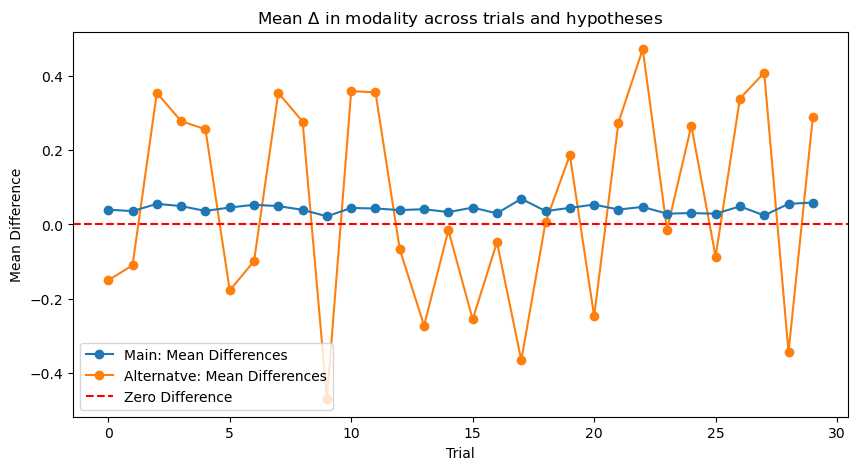

In [33]:
# Calculate mean differences for main hypothesis
main_mean_differences = [(image[trial].mean() - word[trial].mean()) for trial in range(params["n_trials"])]

# Plot the differences across trials
plt.figure(figsize=(10, 5))
plt.plot(main_mean_differences, marker='o', label="Main: Mean Differences",zorder=2)
plt.plot(diff, marker='o', label="Alternatve: Mean Differences", zorder=1)
plt.axhline(0, color='red', linestyle='--', label="Zero Difference")
plt.xlabel("Trial")
plt.ylabel("Mean Difference")
plt.title("Mean $\\Delta$ in modality across trials and hypotheses")
plt.legend()

plt.savefig("figs/compare.png", dpi=500)

plt.show()